# Módulo 30 - K-Means
**Atividade:**

Nesta tarefa, vamos explorar o algoritmo de clustering K-means aplicado a um contexto diferente do usual. Em vez de segmentar perfis de viajantes ou clientes de e-commerce, vamos usar dados biológicos para segmentar diferentes espécies de pinguins com base em características físicas. Esta abordagem destaca a versatilidade do K-means para diversas áreas além de vendas e marketing.

A base de dados utilizada é a penguins do pacote seaborn, que contém informações sobre três espécies de pinguins: Adelie, Chinstrap e Gentoo. As variáveis disponíveis incluem medições físicas dos pinguins coletadas na Antártica.

species: Espécie do pinguim (Adelie, Chinstrap, Gentoo)

island: Ilha onde o pinguim foi observado (Biscoe, Dream, Torgersen)

bill_length_mm: Comprimento do bico em milímetros

bill_depth_mm: Profundidade do bico em milímetros

flipper_length_mm: Comprimento da barbatana em milímetros

body_mass_g: Massa corporal em gramas

sex: Sexo do pinguim (Male, Female)

year: Ano em que a observação foi feita

In [1]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
penguins = sns.load_dataset('penguins')

In [3]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# 1 - Nesse exercício vocês devem verificar se temos variáveis missing, faltantes e excluir esses valores do dataset, também devem excluir as colunas com valores categóricos, que não utilizazam para o Kmeans.

In [4]:
# seu código aqui
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
penguins = penguins.dropna()
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [6]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [7]:
base_encoded =  pd.get_dummies(penguins, columns=['species', 'island', 'sex'])
base_encoded.dtypes

bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
species_Adelie          bool
species_Chinstrap       bool
species_Gentoo          bool
island_Biscoe           bool
island_Dream            bool
island_Torgersen        bool
sex_Female              bool
sex_Male                bool
dtype: object

# 2 - Visualize a análise descritiva dos seus dados utilizando a função vista em aula pairplot. É possível já identificar possíveis agrupamentos? Se sim, quantos?

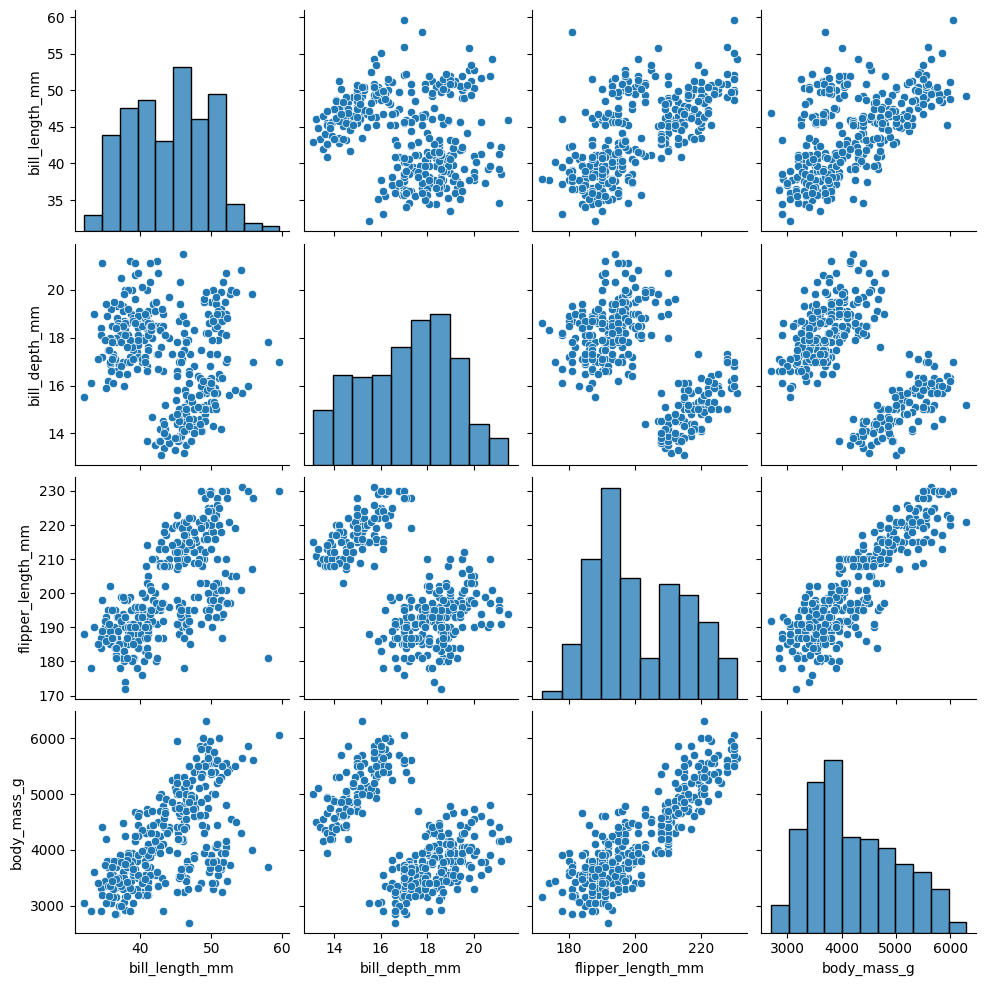

In [8]:
# seu código aqui
sns.pairplot(penguins)

**Analisando gráfico conseguimos observar alguns padrões como:**
 **1-** Penguins com bicos mais profundos (Bill Depth) possui nadadeiras menores (Flipper length)
 **2-** Penguins mais pesados constuma ter a profundidade do bico menor.
 **3-** Conseguimos observar um agrupamento na correlação entre bill_depth e bill_length.

# 3 - Realize a padronização dos dados e visualize os dados.

In [9]:
# seu código aqui
base_padrao = base_encoded.copy()



In [10]:
scaler = StandardScaler()

colunas_padronizar = base_padrao.select_dtypes(include=['int64', 'float64']).columns

base_padrao[colunas_padronizar] = scaler.fit_transform(base_padrao[colunas_padronizar])


In [11]:
base_padrao.head(5)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,-0.896042,0.780732,-1.426752,-0.568475,True,False,False,False,False,True,False,True
1,-0.822788,0.119584,-1.069474,-0.506286,True,False,False,False,False,True,True,False
2,-0.676280,0.424729,-0.426373,-1.190361,True,False,False,False,False,True,True,False
4,-1.335566,1.085877,-0.569284,-0.941606,True,False,False,False,False,True,True,False
5,-0.859415,1.747026,-0.783651,-0.692852,True,False,False,False,False,True,False,True


# 4 - Aplique o algoritmo do k means escolhendo o numero de clusters como igual a 3, que é que a quantidade de espécies que temos na base.

In [12]:
# seu código aqui

kmeans_penguin = KMeans (n_clusters=3, n_init=10, random_state=42)
kmeans_penguin.fit(base_padrao[colunas_padronizar])

KMeans(n_clusters=3, n_init=10, random_state=42)

# 5 - Construa pelo 2 matriz de dispersão como realizada em aula indicando os pontos e centroides.

**Comece usando x='bill_length_mm' e y='bill_depth_mm' para analisar o primeiro gráfico e em seguida escolha outras variaveis para o segundo.**

In [13]:
# seu código aqui

fig = px.scatter(base_padrao, x='bill_length_mm', y='bill_depth_mm',
                 title='Gráfico de Dispersão: Tamanho do bico vs. Profundidade do Bico',
                 labels={'bill_length_mm': 'Tamanho Bico mm', 'bill_depth_mm': 'Profundidade do Bico mm'})

fig.show()

In [14]:
fig = px.scatter(base_padrao, x='body_mass_g', y='bill_depth_mm',
                 title='Gráfico de Dispersão: Massa Corporal vs. Profundidade do Bico',
                 labels={'body_mass_g': 'Massa Corporal g', 'bill_depth_mm': 'Profundidade do Bico mm'})

fig.show()

In [15]:
centroides = kmeans_penguin.cluster_centers_
centroides

array([[-1.04680889,  0.48662566, -0.88169491, -0.7627539 ],
       [ 0.65475809, -1.10270671,  1.16246305,  1.10121078],
       [ 0.67202511,  0.80526339, -0.28934658, -0.38410387]])

In [16]:


# Inverter a padronização para obter os centroides originais
centroides_originais = scaler.inverse_transform(centroides)
centroides_originais

array([[  38.27674419,   18.12170543,  188.62790698, 3593.79844961],
       [  47.56806723,   14.99663866,  217.23529412, 5092.43697479],
       [  47.66235294,   18.74823529,  196.91764706, 3898.23529412]])

In [17]:
labels = kmeans_penguin.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# 6 - Pesquise mais 3 utilidades de aplicações de algoritmos de clusterização e cite abaixo:

Algumas boas aplicações seriam em, **Segementação de clientes** (Markting especializado indicado especificamente para o usuário de interesse), **Agrupamento de dados biologicos** (assim como o nosso exercicio em questão, estamos agrupando caracteristicas pra definir espécies ou raças diferentes) e um outra boa aplicação seria em **Agrupamento geografico** (Geocalização / logistica - agrupando pedidos próximos, otimizando as rotas e reduzindo os custos de transporte)